In [175]:
!pip install scikit-image

In [176]:
import numpy as np
import os
import glob
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import warnings
import pickle 
from skimage.io import imread, imshow
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler    

In [177]:
warnings.filterwarnings("ignore")

# DATA EXPLORATION AND VISUALIZATION

In [178]:
imageDataSetPath = "./dataFinalExam"
subDir = [x[1] for x in os.walk(imageDataSetPath)][0]

Text(0.5, 1.0, 'Class Distribution Plot')

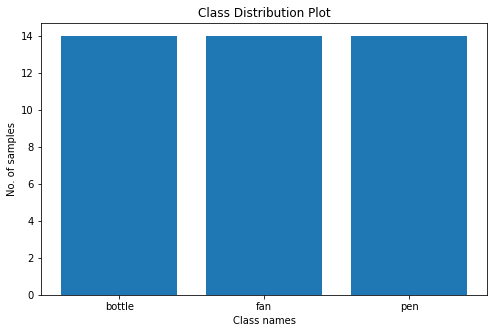

In [179]:
classes = []
samples = []

for directory in subDir:
    imagePath = os.path.join(os.path.abspath(imageDataSetPath),str(directory))
    imageFiles = os.listdir(imagePath) 
    numberOfFiles = len(imageFiles)
    classes.append(directory)
    samples.append(numberOfFiles)
    
fig = plt.figure(figsize = (8, 5))
plt.bar(classes, samples) 
plt.ylabel("No. of samples")
plt.xlabel("Class names")
plt.title("Class Distribution Plot")   



# Feature Extraction 

In [180]:
features = []
for directory in subDir:
    imagePath = os.path.join(os.path.abspath(imageDataSetPath), str(directory) + '/')
#     print("here")
    # Reading all audio .wav files present in a folder
    for file in glob.glob(imagePath + "*.jpg"):
        image = Image.open(file)
        new_image = image.resize((400, 400))
        new_image.save(file)
        image = imread(file, as_gray=True)
        featuresTemp = np.reshape(image, (400*400))
#         print(type(featuresTemp))
        featuresTemp = featuresTemp.tolist()
        featuresTemp.append(directory)
#         temp.append(directory)
        features.append(featuresTemp)

In [181]:
df = pd.DataFrame(features)


In [182]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,159991,159992,159993,159994,159995,159996,159997,159998,159999,160000
0,0.478115,0.478115,0.478115,0.478115,0.478115,0.478115,0.478115,0.478115,0.478115,0.478115,...,0.153497,0.149575,0.149575,0.153497,0.153497,0.153497,0.149575,0.145654,0.141732,bottle
1,0.465071,0.465071,0.465071,0.465071,0.465071,0.465071,0.465071,0.465071,0.457228,0.461149,...,0.835796,0.841667,0.837745,0.837745,0.837745,0.835773,0.835773,0.835773,0.835773,bottle
2,0.501721,0.497800,0.491638,0.487716,0.483795,0.487716,0.492204,0.496125,0.496125,0.496125,...,0.299749,0.327200,0.315435,0.307592,0.303670,0.315435,0.323278,0.327200,0.331121,bottle
3,0.483379,0.483379,0.483379,0.487301,0.487301,0.491222,0.491222,0.491222,0.479458,0.483379,...,0.368960,0.376803,0.372882,0.396411,0.400333,0.376803,0.392489,0.400333,0.361117,bottle
4,0.473526,0.473526,0.473526,0.477448,0.477448,0.481369,0.481369,0.481369,0.481369,0.481369,...,0.333368,0.365306,0.333934,0.300321,0.300321,0.323851,0.343458,0.335615,0.323851,bottle


In [183]:
X = df.iloc[:,:160000]
# print(X)
y = df[160000]
# print(y)

# Categorical Encoding

In [184]:
labelEnc = LabelEncoder()
yNew = labelEnc.fit_transform(y)


In [185]:
xTrain,xTest,yTrain,yTest=train_test_split(X, yNew ,test_size=0.3,random_state=0)

In [186]:
yTrainCategorical = to_categorical(yTrain)
yTestCategorical = to_categorical(yTest)

In [187]:
print(XTrain.shape)
print(XTest.shape)
print(yTrain.shape)
print(yTest.shape)

(29, 160000)
(13, 160000)
(29,)
(13,)


# Building Classifier Model

# Random Classifier

In [188]:
criterion=['gini','entropy']
nEstimators = [int(x) for x in np.linspace(200, 1000, 5)]
maxDepth = [int(x) for x in np.linspace(5, 55, 11)]

hyperParameters = dict(criterion = criterion, n_estimators= nEstimators, max_depth= maxDepth)

In [189]:
# 5 fold CV
rfRandom = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = hyper_parameters, 
                               n_iter = 200, cv = 5, verbose = 2, random_state = 42, scoring="accuracy",
                               n_jobs = -1)

In [190]:
search = rfRandom.fit(XTrain,yTrain)
search.best_params_

Fitting 5 folds for each of 110 candidates, totalling 550 fits


{'n_estimators': 200, 'max_depth': 10, 'criterion': 'gini'}

In [191]:
classifier = search.best_estimator_

In [192]:
scores = cross_val_score(classifier, XTrain, yTrain, cv=5)
meanAcc = np.mean(scores)*100
print("Cross validation accuracy on Train set: {:.2f}%".format(meanAcc))

Cross validation accuracy on Train set: 82.00%


In [193]:
# stX= StandardScaler()    
# xTrain= stX.fit_transform(xTrain)    
# xTest= stX.transform(xTest)    

In [194]:
# classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
# classifier.fit(xTrain, yTrain)  

In [195]:
# accuracy = classifier.score(XTrain, yTrain)
# print("Accuracy on Train set: {:.2f}%".format(accuracy * 100))

In [196]:
accuracy = classifier.score(XTest, yTest)
print("Accuracy on Test set: {:.2f}%".format(accuracy * 100))


# bestModel.predict()

Accuracy on Test set: 84.62%


In [197]:
with open('final_model.pkl', 'wb') as fp:
    pickle.dump(classifier, fp)